In [1]:
from datetime import datetime
start_time = datetime.now()

# Libraries to install
# %pip install pandas-profiling

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statistics

In [2]:
%%time
data = pd.read_csv('NY property data.csv')

CPU times: user 2.63 s, sys: 342 ms, total: 2.97 s
Wall time: 2.98 s


In [3]:
data.shape

(1070994, 32)

In [4]:
numrecords = len(data)
print(numrecords)

1070994


In [5]:
data.dtypes

RECORD        int64
BBLE         object
BORO          int64
BLOCK         int64
LOT           int64
EASEMENT     object
OWNER        object
BLDGCL       object
TAXCLASS     object
LTFRONT       int64
LTDEPTH       int64
EXT          object
STORIES     float64
FULLVAL     float64
AVLAND      float64
AVTOT       float64
EXLAND      float64
EXTOT       float64
EXCD1       float64
STADDR       object
ZIP         float64
EXMPTCL      object
BLDFRONT      int64
BLDDEPTH      int64
AVLAND2     float64
AVTOT2      float64
EXLAND2     float64
EXTOT2      float64
EXCD2       float64
PERIOD       object
YEAR         object
VALTYPE      object
dtype: object

In [6]:
data.head()

,RECORD,BBLE,BORO,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,...,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,...,0,0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,...,0,0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709,...,709,564,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793,...,85,551,13644000.0,15750000.0,13644000.0,15750000.0,NaN,FINAL,2010/11,AC-TR
4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323,...,89,57,106348680.0,107758350.0,106348680.0,107758350.0,NaN,FINAL,2010/11,AC-TR


In [7]:
#create a dataframe for numeric values
numeric = data[['LTFRONT', 'LTDEPTH', 'STORIES', 'FULLVAL', 'AVLAND', 'AVTOT', 'EXLAND', 'EXTOT', 'BLDFRONT', 'BLDDEPTH', 'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2']]

In [8]:
numeric.describe()

,LTFRONT,LTDEPTH,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2
count,1.070994e+06,1.070994e+06,1.014730e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,2.827260e+05,2.827320e+05,8.744900e+04,1.308280e+05
mean,3.663530e+01,8.886159e+01,5.006918e+00,8.742645e+05,8.506792e+04,2.272382e+05,3.642389e+04,9.118698e+04,2.304277e+01,3.992284e+01,2.462357e+05,7.139114e+05,3.512357e+05,6.567683e+05
std,7.403284e+01,7.639628e+01,8.365707e+00,1.158243e+07,4.057260e+06,6.877529e+06,3.981576e+06,6.508403e+06,3.557970e+01,4.270715e+01,6.178963e+06,1.165253e+07,1.080221e+07,1.607251e+07
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,3.000000e+00,1.000000e+00,7.000000e+00
25%,1.900000e+01,8.000000e+01,2.000000e+00,3.040000e+05,9.180000e+03,1.837400e+04,0.000000e+00,0.000000e+00,1.500000e+01,2.600000e+01,5.705000e+03,3.391200e+04,2.090000e+03,2.870000e+03
50%,2.500000e+01,1.000000e+02,2.000000e+00,4.470000e+05,1.367800e+04,2.534000e+04,1.620000e+03,1.620000e+03,2.000000e+01,3.900000e+01,2.014500e+04,7.996250e+04,3.048000e+03,3.706200e+04
75%,4.000000e+01,1.000000e+02,3.000000e+00,6.190000e+05,1.974000e+04,4.543800e+04,1.620000e+03,2.090000e+03,2.400000e+01,5.000000e+01,6.264000e+04,2.405510e+05,3.177900e+04,1.068408e+05
max,9.999000e+03,9.999000e+03,1.190000e+02,6.150000e+09,2.668500e+09,4.668309e+09,2.668500e+09,4.668309e+09,7.575000e+03,9.393000e+03,2.371005e+09,4.501180e+09,2.371005e+09,4.501180e+09


In [9]:
#drop columns that are similar in both data and numeric and keep unique columns
cat = data.drop([col for col in data.columns if col in data.columns and col in numeric.columns], axis=1)

### Build the numeric table

In [10]:
#find standard deviation
stdev = numeric.std()

In [11]:
#find min value
min = numeric.min()

In [12]:
#find max value
max = numeric.max()

In [13]:
#calculate % zeros
zero_count = ((numeric == 0).sum())/1070994*100

In [14]:
zero_count

LTFRONT     15.789818
LTDEPTH     15.885056
STORIES      0.000000
FULLVAL      1.214479
AVLAND       1.214666
AVTOT        1.214479
EXLAND      45.910528
EXTOT       40.389769
BLDFRONT    21.364732
BLDDEPTH    21.368280
AVLAND2      0.000000
AVTOT2       0.000000
EXLAND2      0.000000
EXTOT2       0.000000
dtype: float64

In [15]:
#calculate mean
mean = round(numeric.describe().loc['mean'],2)

In [16]:
#calculate % Populated
notnulls = round((numeric.notnull().sum()/1070994)*100,2)

In [17]:
#format numbers
pd.options.display.float_format = '{:,.0f}'.format
#create indeces
num_idx = numeric.columns
#create the dataframe
numtable = pd.DataFrame(list(zip(notnulls, min, max, mean, stdev, zero_count))
, index=num_idx
, columns = ['% Populated', 'Min', 'Max', 'Mean', 'Stdev', '% Zero'])

In [18]:
#add year to the table
numtable.loc['YEAR'] = [100.00, '2010/11', '2010/11', 'N/A', 'N/A', 0.00]

In [19]:
numtable

,% Populated,Min,Max,Mean,Stdev,% Zero
LTFRONT,100,0,"9,999",37,74,16
LTDEPTH,100,0,"9,999",89,76,16
STORIES,95,1,119,5,8,0
FULLVAL,100,0,"6,150,000,000","874,265","11,582,431",1
AVLAND,100,0,"2,668,500,000","85,068","4,057,260",1
AVTOT,100,0,"4,668,308,947","227,238","6,877,529",1
EXLAND,100,0,"2,668,500,000","36,424","3,981,576",46
EXTOT,100,0,"4,668,308,947","91,187","6,508,403",40
BLDFRONT,100,0,"7,575",23,36,21
BLDDEPTH,100,0,"9,393",40,43,21


### Build the categorical table

In [20]:
#calculate % Populated
notnulls_cat = round((cat.notnull().sum()/1070994)*100,2)

In [21]:
#calculate # of unique values
unique = cat.nunique()

In [22]:
mode = cat.mode()

In [23]:
mode=mode.iloc[0]

In [24]:
cat_idx = cat.columns

In [25]:
pd.options.display.float_format = '{:,.0f}'.format
cattable = pd.DataFrame(list(zip(notnulls_cat, unique, mode))
, index=cat_idx
, columns = ['% Populated', '# Unique Values', 'Most Common Value'])

In [26]:
cattable

,% Populated,# Unique Values,Most Common Value
RECORD,100,1070994,1
BBLE,100,1070994,1000010101
BORO,100,5,4
BLOCK,100,13984,"3,944"
LOT,100,6366,1
EASEMENT,0,12,E
OWNER,97,863347,PARKCHESTER PRESERVAT
BLDGCL,100,200,R4
TAXCLASS,100,11,1
EXT,33,3,G


### Explore Each Field

#### Record

In [27]:
plt.rcParams.update({'figure.figsize':(12,6)})
plt.rcParams.update({'font.size':20})

In [28]:
len(data['RECORD'].unique())

1070994

In [29]:
len(data['RECORD'])

1070994

Text(0, 0.5, 'Count')

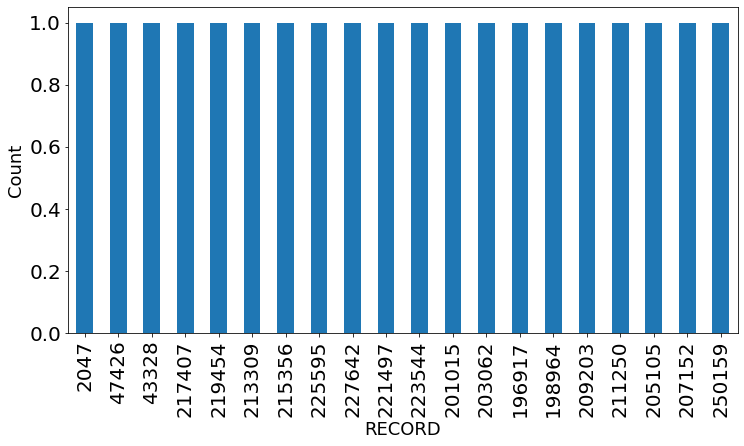

In [30]:
data['RECORD'].value_counts().head(20).plot(kind='bar')
plt.xlabel('RECORD', fontsize = 18)
plt.ylabel('Count', fontsize=18)

RECORD is a unique indicator for each property.

#### BBLE

In [31]:
len(data['BBLE'].unique())

1070994

Text(0, 0.5, 'Count')

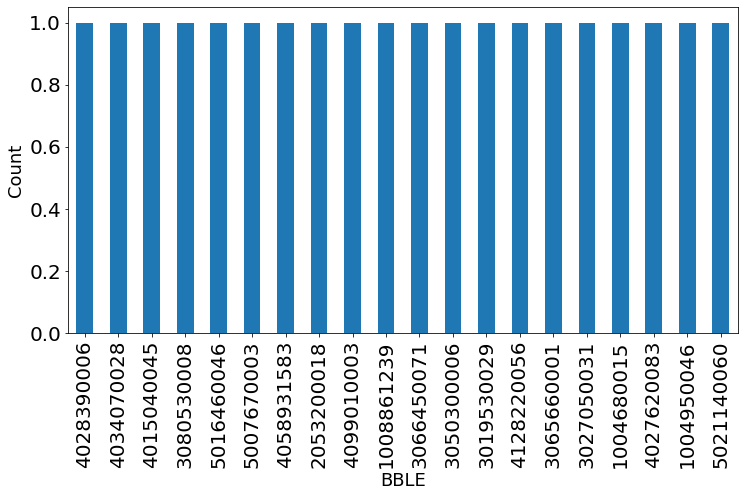

In [32]:
data['BBLE'].value_counts().head(20).plot(kind='bar')
plt.xlabel('BBLE', fontsize = 18)
plt.ylabel('Count', fontsize=18)

#### BORO

In [33]:
len(data['BORO'].unique())

5

In [34]:
data['BORO'].count() * 100 / numrecords

100.0

Text(20.5, 0.5, 'Count')

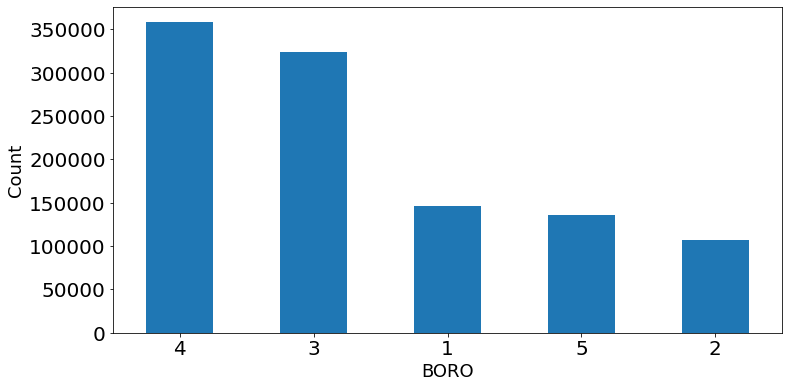

In [35]:
data['BORO'].value_counts().head(20).plot(kind='bar')
plt.xticks(rotation=0)
plt.savefig('plot')
plt.xlabel('BORO', fontsize = 18)
plt.ylabel('Count', fontsize=18)

BORO indicates which of the 5 Boroughs of NY the property is located in.
- 1 = Manhattan
- 2 = Bronx
- 3 = Brooklyn
- 4 = Queens
- 5 = Staten Island

#### BLOCK

In [36]:
data['BLOCK'].count() * 100 / numrecords

100.0

In [37]:
len(data['BLOCK'].unique())

13984

In [38]:
data['BLOCK'].min()

1

Text(0, 0.5, 'Count')

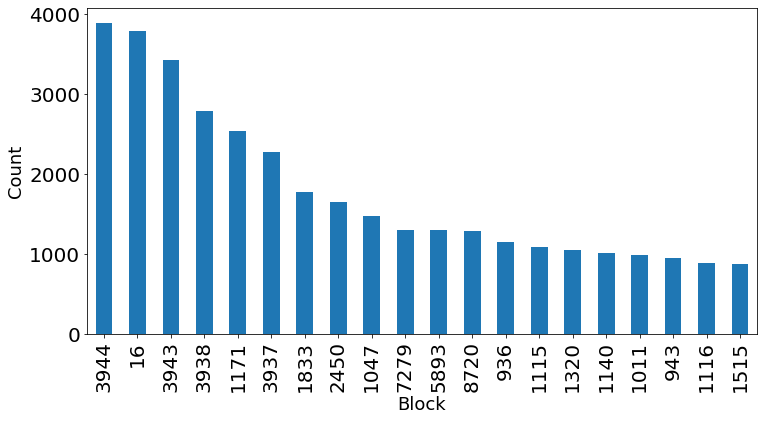

In [39]:
data['BLOCK'].value_counts().head(20).plot(kind='bar')
plt.xlabel('Block', fontsize = 18)
plt.ylabel('Count', fontsize=18)

Block partains to block ranges per Borough.
- Manhattan: 1 to 2255
- Bronx: 2260 to 5958
- Brooklyn: 1 to 8955
- Queens: 1 to 16350
- Staten Island: 1 to 8050

#### LOT

In [40]:
data['LOT'].count() * 100 / numrecords

100.0

In [41]:
len(data['LOT'].unique())

6366

In [42]:
data['LOT'].value_counts()

1       24367
20      12294
15      12171
12      12143
14      12074
        ...  
5547        1
8075        1
6883        1
5460        1
9108        1
Name: LOT, Length: 6366, dtype: int64

In [43]:
data['LOT'].min()

1

Text(0, 0.5, 'Count')

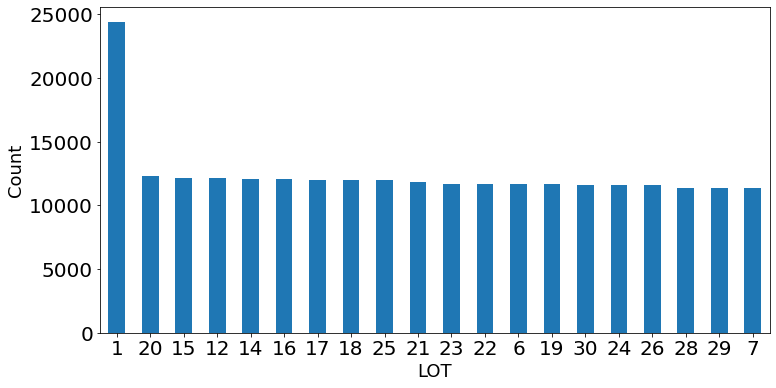

In [44]:
data['LOT'].value_counts().head(20).plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('LOT', fontsize = 18)
plt.ylabel('Count', fontsize=18)

LOT is a label for the lot number of the property.

#### EASEMENT

In [45]:
data['EASEMENT'].count() * 100 / numrecords

0.4328689049611856

In [46]:
len(data['EASEMENT'].unique())

13

In [47]:
data['EASEMENT'].value_counts()

E    4148
F     296
G     102
H      33
N      19
I      16
J       8
K       5
P       3
L       3
M       2
U       1
Name: EASEMENT, dtype: int64

Text(61.483281250000005, 0.5, 'log Scale of Count')

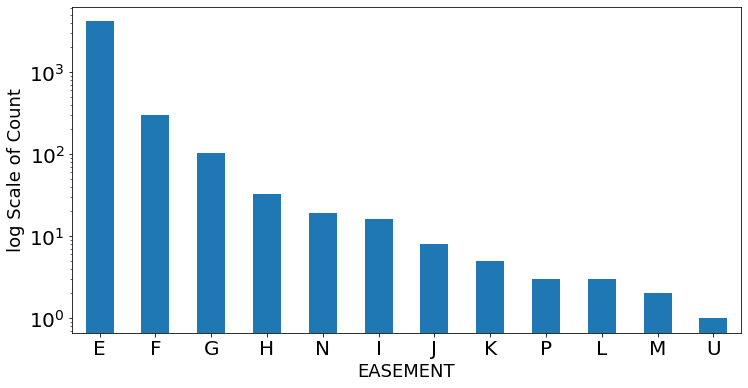

In [48]:
plt.yscale('log')
data['EASEMENT'].value_counts().head(20).plot(kind='bar')
plt.xticks(rotation=0)
plt.savefig('plot.png')
plt.xlabel('EASEMENT', fontsize = 18)
plt.ylabel('log Scale of Count', fontsize=18)

Easement gives a person or entity the right to access property that's owned by someone else for a limited and specific purpose.

- Space = No Easement
- A = Air Easement
- B =  Non-Air Rights
- E =  Land Easement
- F Thru M  are duplicates of E
- N = Non-Transit Easement                                       
- P = Pier
- R = Railroad
- S = Street
- U = U.S. Government

#### OWNER

In [49]:
data['OWNER'].count() * 100 / numrecords

97.03593110699033

In [50]:
len(data['OWNER'].unique())

863348

In [51]:
data['OWNER'].value_counts()

PARKCHESTER PRESERVAT    6021
PARKS AND RECREATION     4255
DCAS                     2169
HOUSING PRESERVATION     1904
CITY OF NEW YORK         1450
                         ... 
JERRY D ONOFRIO             1
TYLER, RONALD E             1
HENRY, HECTOR               1
ANTHONY PERDIKOGIANNI       1
THOMPSON CARMELITA          1
Name: OWNER, Length: 863347, dtype: int64

Text(0, 0.5, 'Count')

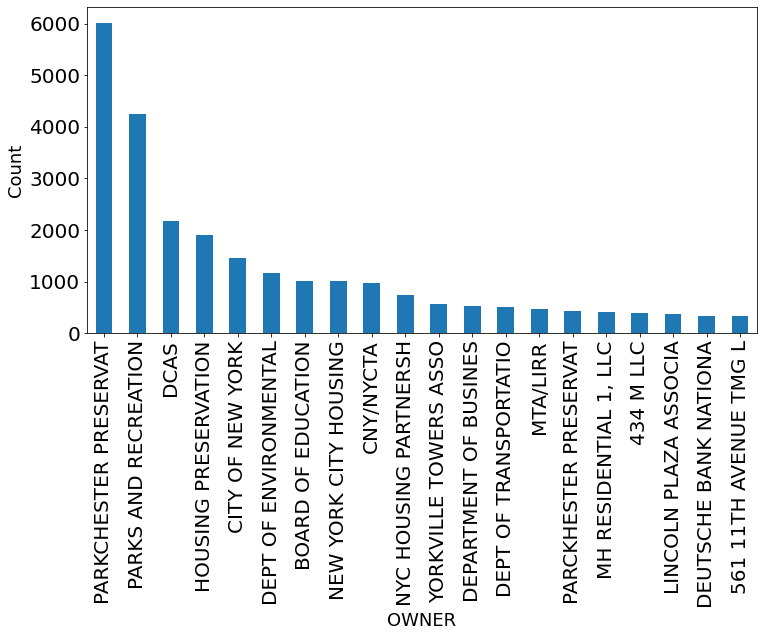

In [52]:
data['OWNER'].value_counts().head(20).plot(kind='bar')
plt.xlabel('OWNER', fontsize = 18)
plt.ylabel('Count', fontsize=18)

This field lists the owner of the property

#### BLDGCL

In [53]:
len(data['BLDGCL'].unique())

200

In [54]:
data['BLDGCL'].count() * 100 / numrecords

100.0

In [55]:
data['BLDGCL'].value_counts()

R4    139879
A1    123369
A5     96984
B1     84208
B2     77598
       ...  
I2         4
I3         4
H7         3
E6         1
Y5         1
Name: BLDGCL, Length: 200, dtype: int64

In [56]:
data[data['BLDGCL'] == 0]

,RECORD,BBLE,BORO,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,...,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE


Text(0, 0.5, 'Count')

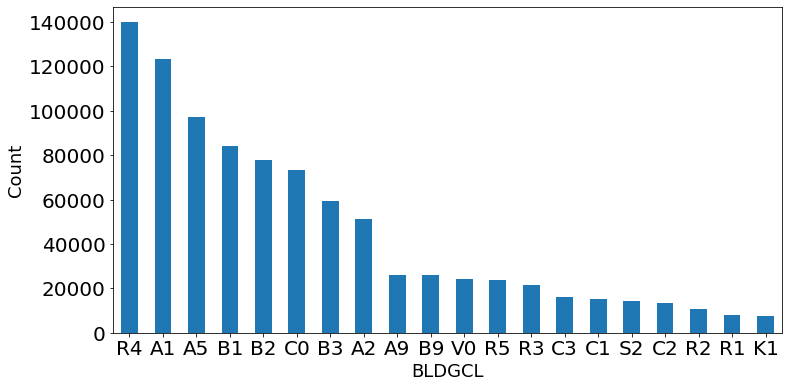

In [57]:
data['BLDGCL'].value_counts().head(20).plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('BLDGCL', fontsize = 18)
plt.ylabel('Count', fontsize=18)

BLDGCL means Building Class

#### TAXCLASS

In [58]:
data['TAXCLASS'].count() * 100 / numrecords

100.0

In [59]:
len(data['TAXCLASS'].unique())

11

In [60]:
data['TAXCLASS'].value_counts()

1     660721
2     188612
4     104310
2A     40574
1B     24738
1A     21667
2B     13964
2C     10795
3       4638
1C       946
1D        29
Name: TAXCLASS, dtype: int64

Text(0, 0.5, 'log Scale of Count')

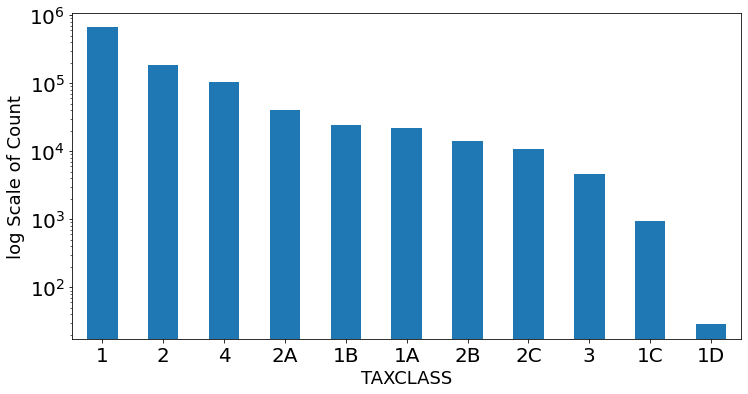

In [61]:
plt.yscale('log')
data['TAXCLASS'].value_counts().head(20).plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('TAXCLASS', fontsize = 18)
plt.ylabel('log Scale of Count', fontsize=18)

#### LTFRONT

In [62]:
data['LTFRONT'].count() * 100 / numrecords

100.0

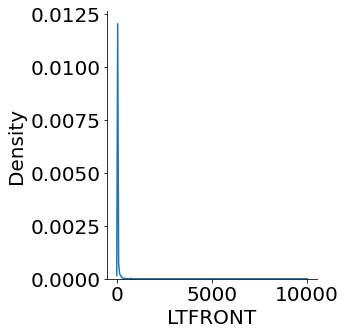

In [63]:
sns.displot(data['LTFRONT'], kind = 'kde')

<AxesSubplot:xlabel='LTFRONT'>

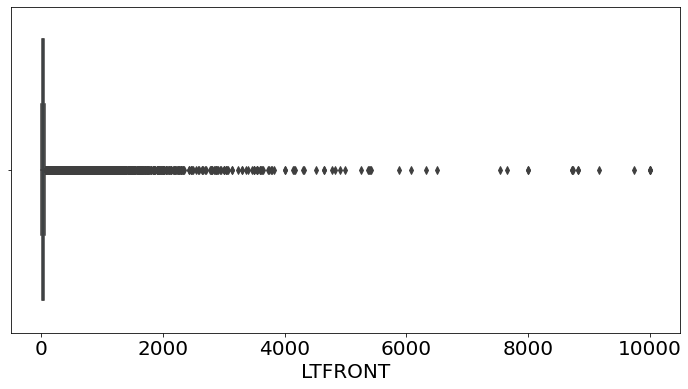

In [64]:
sns.boxplot(x='LTFRONT', data=data)

/Users/faris/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LTFRONT'>

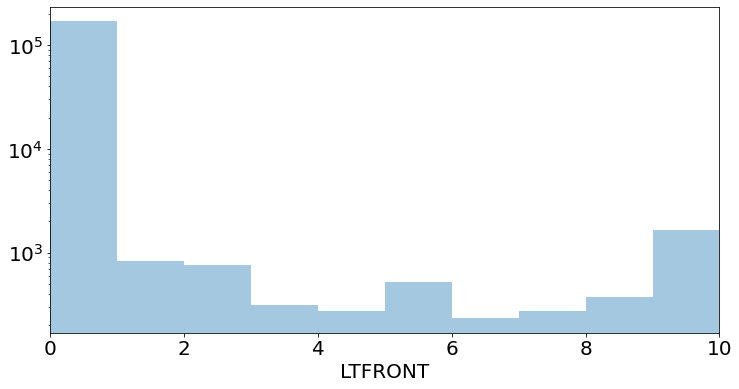

In [65]:
# look at the very small sizes, including zeros
xhigh = 10
plt.xlim(0,xhigh)
temp = data[data['LTFRONT'] <= xhigh]
plt.yscale('log')
sns.distplot(temp['LTFRONT'],bins=10, kde=False)

/Users/faris/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'log Scale of Density')

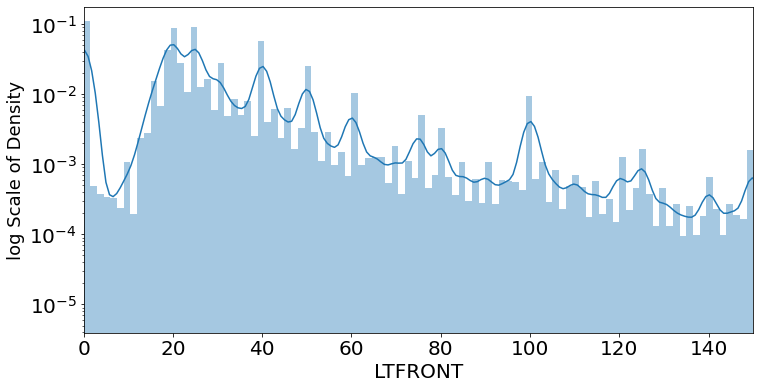

In [66]:
#look at the most relevant range
xhigh = 150
plt.xlim(0,xhigh)
temp = data[data['LTFRONT'] <= xhigh]
sns.distplot(temp['LTFRONT'],bins=100, kde=True)
plt.yscale('log')
plt.ylabel('log Scale of Density', fontsize=18)

LTFRONT refers to the property lot width.

#### LTDEPTH

<AxesSubplot:xlabel='LTDEPTH'>

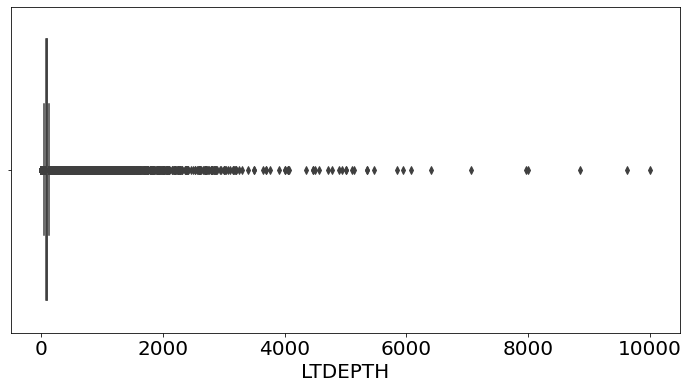

In [67]:
sns.boxplot(x='LTDEPTH', data=data)

/Users/faris/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LTDEPTH'>

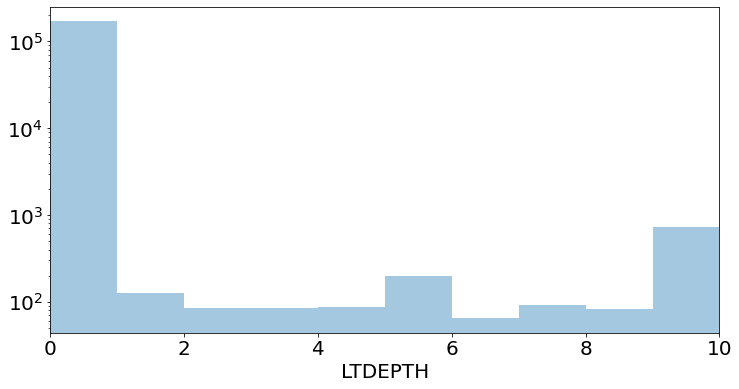

In [68]:
# look at the very small sizes, including zeros
xhigh = 10
plt.xlim(0,xhigh)
temp = data[data['LTDEPTH'] <= xhigh]
plt.yscale('log')
sns.distplot(temp['LTDEPTH'],bins=10, kde=False)

/Users/faris/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'log Scale of Density')

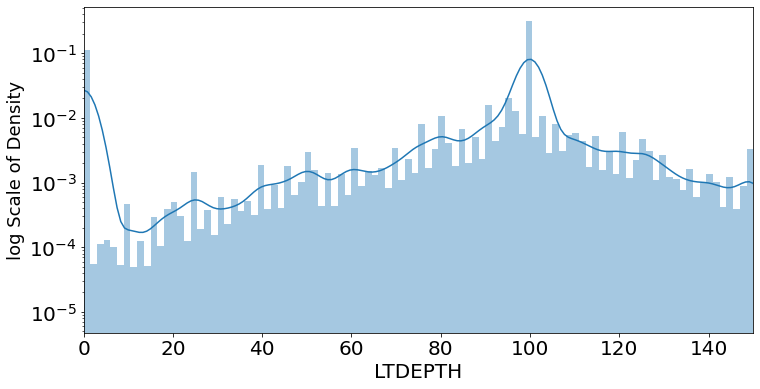

In [69]:
#look at the most relevant range
xhigh = 150
plt.xlim(0,xhigh)
temp = data[data['LTDEPTH'] <= xhigh]
sns.distplot(temp['LTDEPTH'],bins=100, kde=True)
plt.yscale('log')
plt.ylabel('log Scale of Density', fontsize=18)

LTDEPTH refers to the lot depth.

### Look at the number of sizes that are zero or unusually small. These aren't really zero, more likely they're missing data

In [70]:
len(data[data['LTFRONT']==0])

169108

In [71]:
len(data[data['LTFRONT']==1])

839

In [72]:
len(data[data["LTFRONT"]==2])

762

In [73]:
data['LTFRONT'].value_counts()

0       169108
20      135178
25      117306
40       85389
18       40668
         ...  
1301         1
1302         1
774          1
2331         1
1023         1
Name: LTFRONT, Length: 1297, dtype: int64

In [74]:
data['LTDEPTH'].count() * 100 / numrecords

100.0

<AxesSubplot:xlabel='LTDEPTH'>

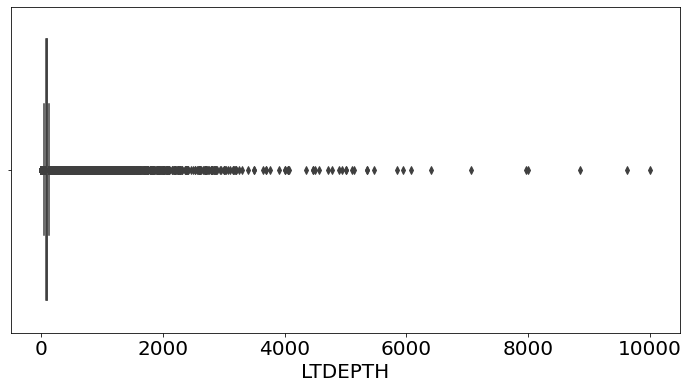

In [75]:
sns.boxplot(x='LTDEPTH', data=data)

In [76]:
len(data[data['LTDEPTH']==0])

170128

In [77]:
len(data[data['LTDEPTH']==1])

127

In [78]:
len(data[data["LTDEPTH"]==2])

84

In [79]:
data['LTDEPTH'].value_counts()

100     464541
0       170128
95       31612
90       20294
80       16671
         ...  
1471         1
1224         1
820          1
2253         1
4720         1
Name: LTDEPTH, Length: 1370, dtype: int64

#### EXT

In [80]:
data['EXT'].value_counts()

G     266970
E      49442
EG     37893
Name: EXT, dtype: int64

In [81]:
data['EXT'].count() * 100 / numrecords

33.081884679092504

Text(0, 0.5, 'Count')

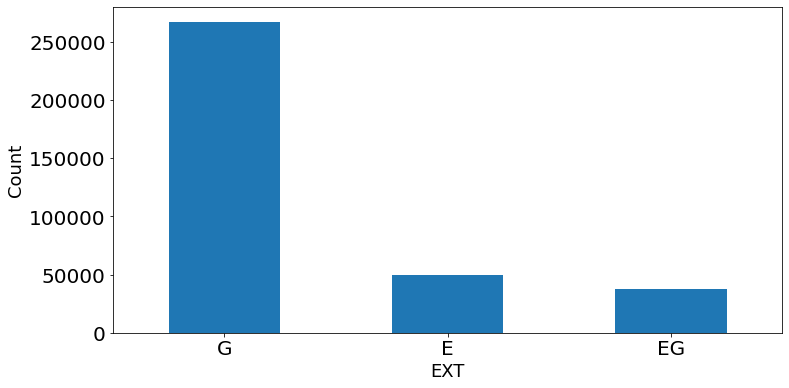

In [82]:
data['EXT'].value_counts().head(20).plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('EXT', fontsize = 18)
plt.ylabel('Count', fontsize=18)

EXT refers to extension indicator.

#### STORIES

In [83]:
data['STORIES'].count() * 100 / numrecords

94.74656253909919

In [84]:
sum(pd.isnull(data['STORIES']))

56264

<AxesSubplot:xlabel='STORIES'>

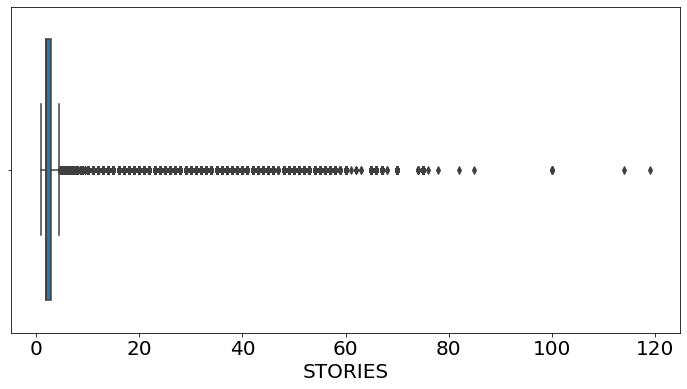

In [85]:
sns.boxplot(x='STORIES', data=data)

In [86]:
len(data[data['STORIES'] == 0])

0

/Users/faris/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='STORIES', ylabel='Density'>

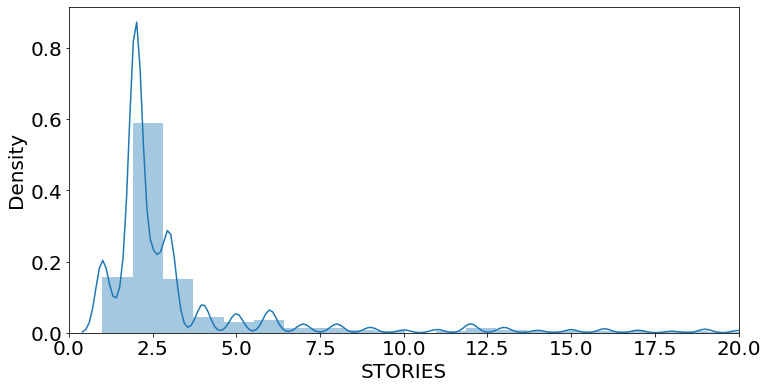

In [87]:
xhigh = 20
temp = data[data['STORIES'] > 0]
temp.count()
plt.xlim(0,xhigh)
temp = temp[temp['STORIES'] <= xhigh]
sns.distplot(temp['STORIES'],bins=21, kde=True)

STORIES refers to the number of stories in the building

In [88]:
len(data[data['STORIES'] == 1])

96706

In [89]:
data['STORIES'].value_counts()

2     415092
3     130127
1      96706
2      82292
4      38342
       ...  
76         1
2          1
61         1
85         1
78         1
Name: STORIES, Length: 111, dtype: int64

#### FULLVAL

In [90]:
data['FULLVAL'].count() * 100 / numrecords

100.0

<AxesSubplot:xlabel='FULLVAL'>

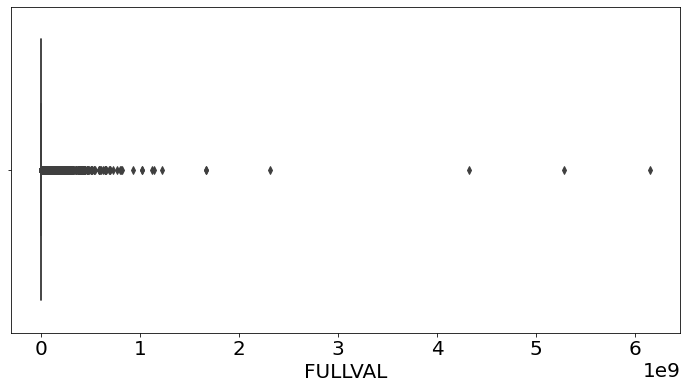

In [91]:
sns.boxplot(x='FULLVAL', data=data)

/Users/faris/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FULLVAL'>

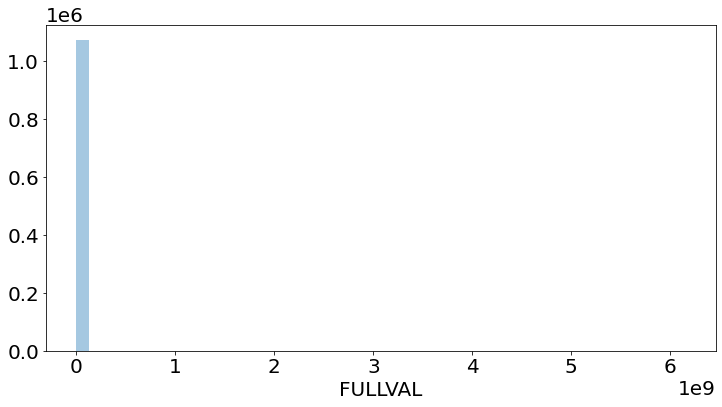

In [92]:
sns.distplot(data['FULLVAL'],kde=False)

In [93]:
len(data[data['FULLVAL']==0])

13007

In [94]:
len(data[data['FULLVAL']==1])

0

In [95]:
len(data[data['FULLVAL']==2])

0

/Users/faris/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


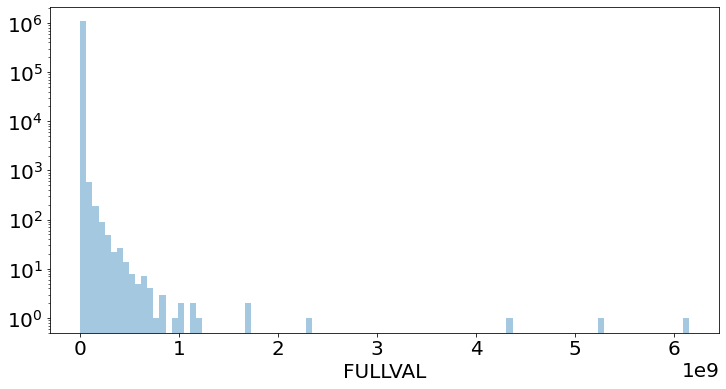

In [96]:
temp = data[data['FULLVAL'] >= 0]
ax = sns.distplot(temp['FULLVAL'],bins=100, kde=False)
ax.set_yscale('log')

/Users/faris/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FULLVAL', ylabel='Density'>

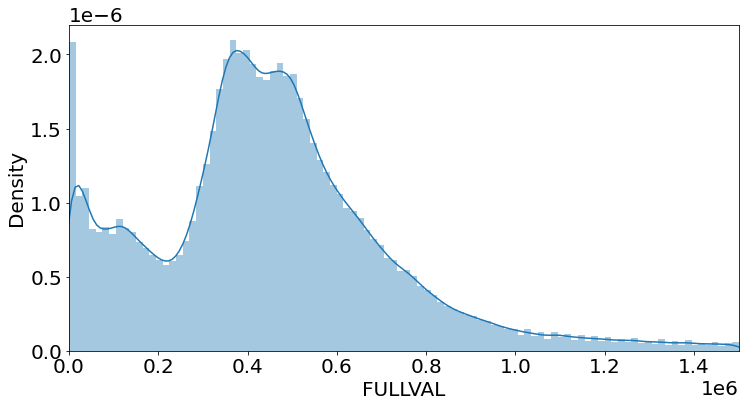

In [97]:
xhigh = 1500000
plt.xlim(0,xhigh)
temp = data[data['FULLVAL'] <= xhigh]
sns.distplot(temp['FULLVAL'],bins=100, kde=True)

/Users/faris/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FULLVAL', ylabel='Density'>

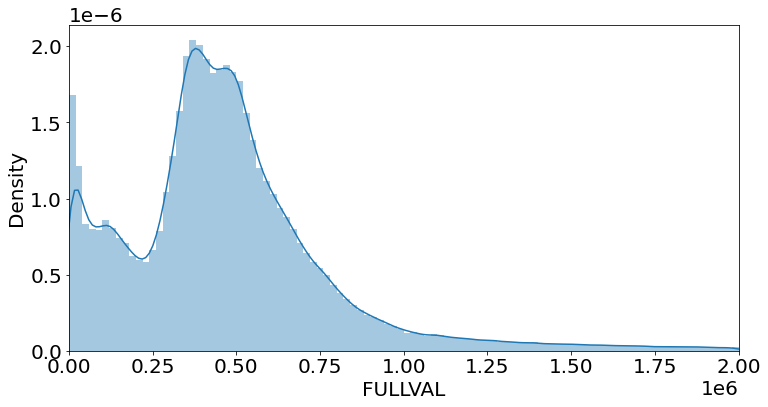

In [98]:
xhigh = 2000000
plt.xlim(0,xhigh)
temp = data[data['FULLVAL'] <= xhigh]
sns.distplot(temp['FULLVAL'],bins=100, kde=True)
#plt.savefig('dist good.png')

FULLVAL refers to the market value of the property

/Users/faris/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FULLVAL', ylabel='Density'>

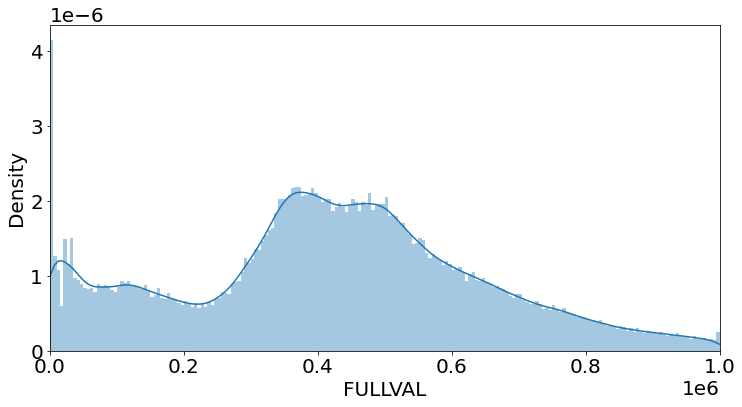

In [99]:
xhigh = 1000000
plt.xlim(0,xhigh)
temp = data[data['FULLVAL'] <= xhigh]
sns.distplot(temp['FULLVAL'],bins=200, kde=True)

/Users/faris/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FULLVAL'>

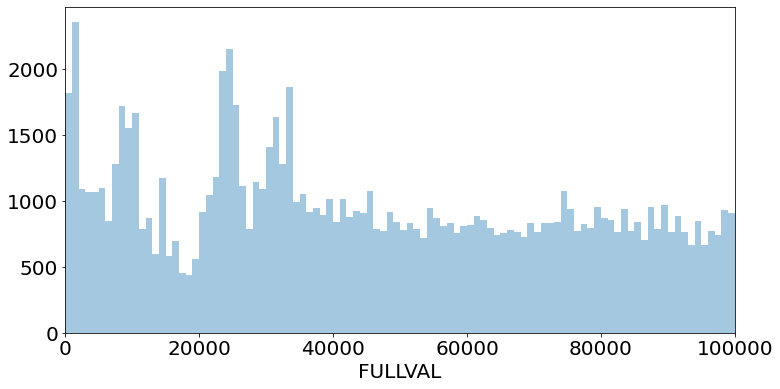

In [100]:
xhigh = 100000
plt.xlim(0,xhigh)
temp = data[(data['FULLVAL'] <= xhigh) & (data['FULLVAL']) > 0]
sns.distplot(temp['FULLVAL'],bins=100, kde=False)

In [101]:
len(data[data['FULLVAL'] == 0])

13007

#### AVLAND

In [102]:
data['AVLAND'].count() * 100 / numrecords

100.0

<AxesSubplot:xlabel='AVLAND'>

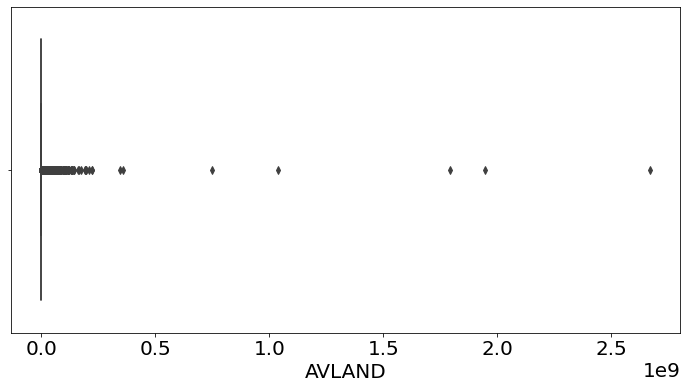

In [103]:
sns.boxplot(x='AVLAND', data=data)

/Users/faris/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AVLAND'>

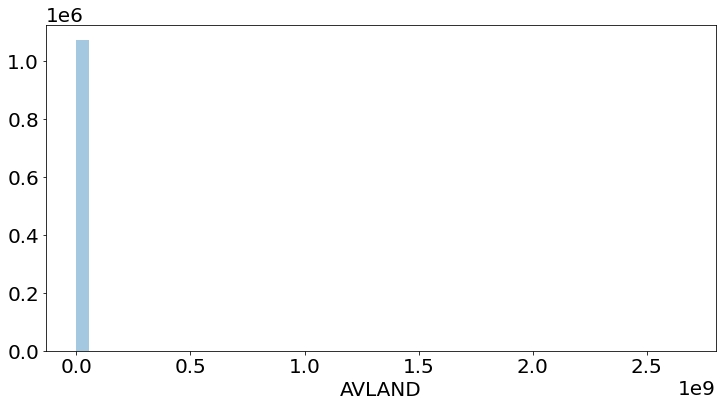

In [104]:
sns.distplot(data['AVLAND'],kde=False)

In [105]:
len(data[data['AVLAND']==0])

13009

In [106]:
len(data[data['AVLAND']==1])

3

In [107]:
len(data[data["AVLAND"]==2])

13

/Users/faris/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AVLAND', ylabel='Density'>

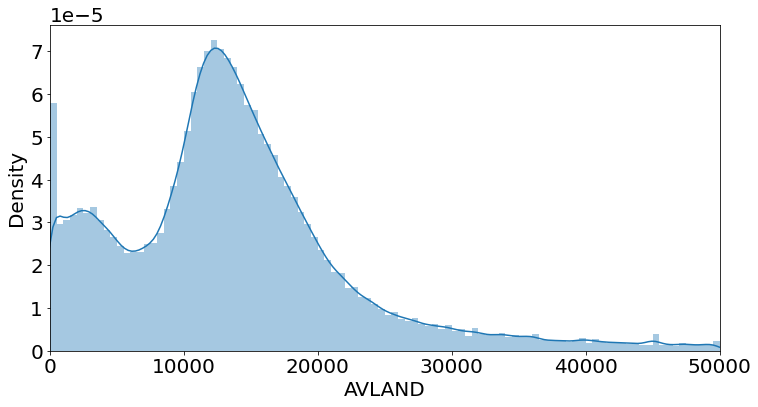

In [108]:
xhigh = 50000
plt.xlim(0,xhigh)
temp = data[data['AVLAND'] <= xhigh]
sns.distplot(temp['AVLAND'],bins=100, kde=True)

AVLAND refers to the actual land value of the property

#### AVTOT

In [109]:
data['AVTOT'].count() * 100 / numrecords

100.0

<AxesSubplot:xlabel='AVTOT'>

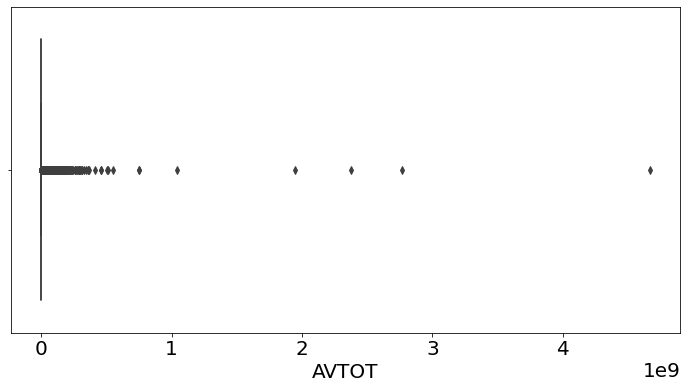

In [110]:
sns.boxplot(x='AVTOT', data=data)

/Users/faris/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AVTOT', ylabel='Density'>

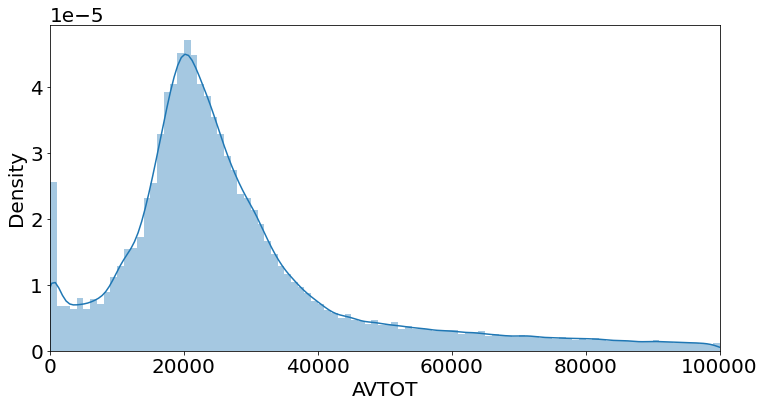

In [111]:
xhigh = 100000
plt.xlim(0,xhigh)
temp = data[data['AVTOT'] <= xhigh]
sns.distplot(temp['AVTOT'],bins=100, kde=True)

AVTOT refers to the total property value

In [112]:
len(data[data['AVTOT']==0])

13007

In [113]:
len(data[data['AVTOT']==1])

3

In [114]:
len(data[data['AVTOT']==2])

2

#### EXLAND

In [115]:
data['EXLAND'].count() * 100 / numrecords

100.0

<AxesSubplot:xlabel='EXLAND'>

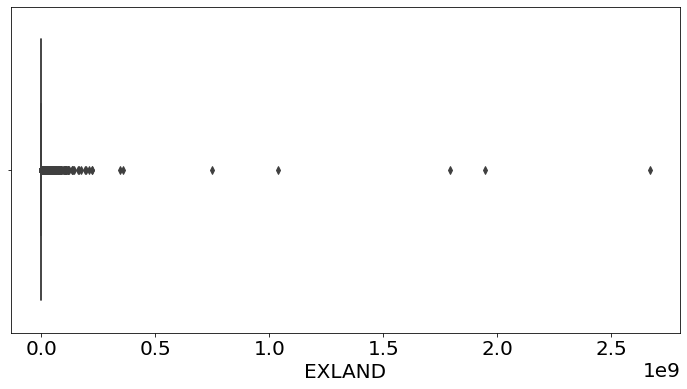

In [116]:
sns.boxplot(x='EXLAND', data=data)

/Users/faris/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'log Scale of Density')

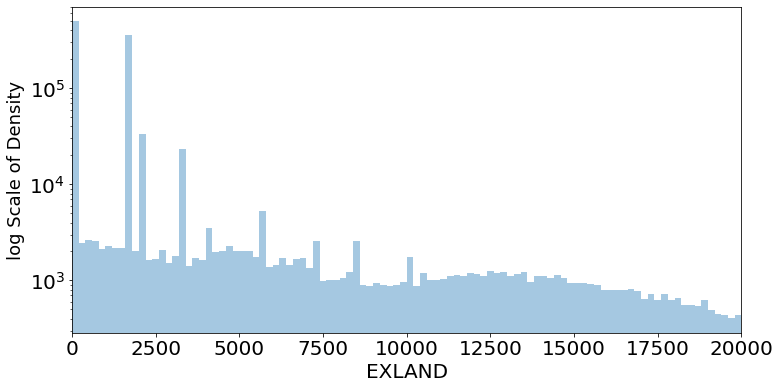

In [117]:
xhigh = 20000
plt.xlim(0,xhigh)
temp = data[data['EXLAND'] <= xhigh]
sns.distplot(temp['EXLAND'],bins=100, kde=False)
plt.yscale('log')
plt.ylabel('log Scale of Density', fontsize=18)

EXLAND refers to the actual exempt land value

In [118]:
len(data[data['EXLAND']==0])

491699

In [119]:
len(data[data['EXLAND']==1])

8

In [120]:
len(data[data['EXLAND']==2])

15

#### EXTOT

In [121]:
data['EXTOT'].count() * 100 / numrecords

100.0

<AxesSubplot:xlabel='EXTOT'>

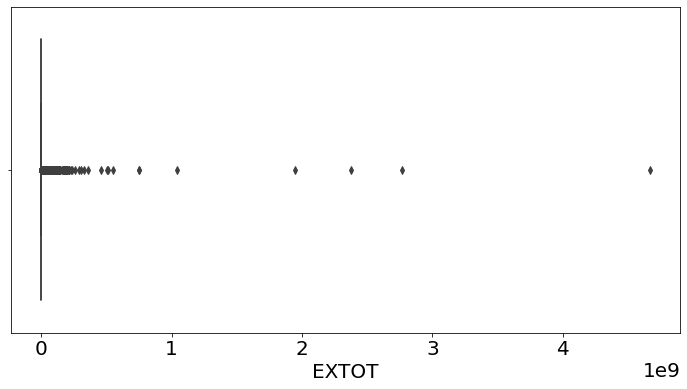

In [122]:
sns.boxplot(x='EXTOT', data=data)

In [123]:
len(data[data['EXTOT']==0])

432572

In [124]:
len(data[data['EXTOT']==1])

10

In [125]:
len(data[data['EXTOT']==2])

2

/Users/faris/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'log Scale of Density')

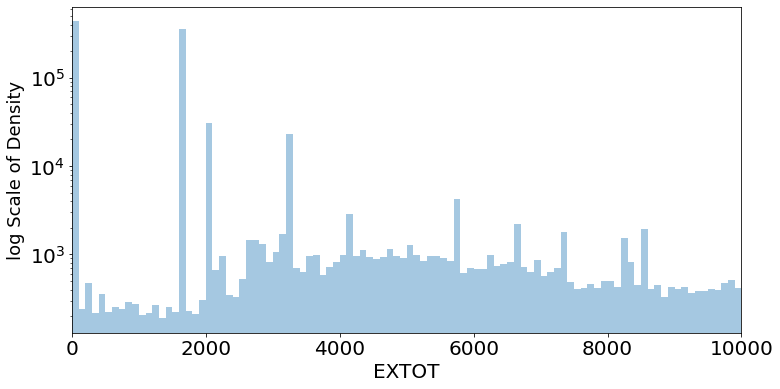

In [126]:
xhigh = 10000
plt.xlim(0,xhigh)
temp = data[data['EXTOT'] <= xhigh]
sns.distplot(temp['EXTOT'],bins=100, kde=False)
plt.yscale('log')
plt.ylabel('log Scale of Density', fontsize=18)

EXTOT refers to the actual exempt land total

#### EXCD1

In [127]:
data['EXCD1'].count() * 100 / numrecords

59.616393742635346

<AxesSubplot:xlabel='EXCD1'>

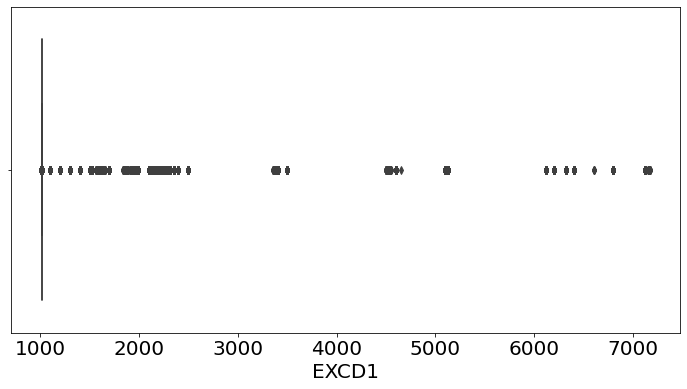

In [128]:
sns.boxplot(x='EXCD1', data=data)

In [129]:
len(data[data['EXCD1']==0])

0

In [130]:
len(data[data['EXCD1']==1])

0

In [131]:
len(data[data['EXCD1']==2])

0

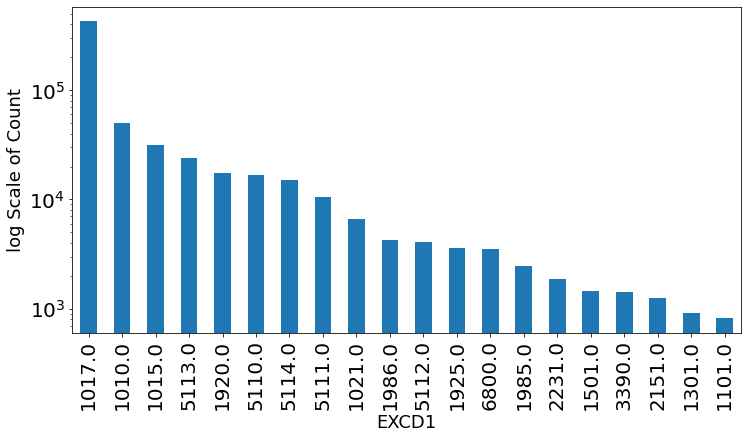

In [132]:
data['EXCD1'].value_counts().head(20).plot(kind='bar')
plt.xlabel('EXCD1', fontsize = 18)
plt.ylabel('log Scale of Count', fontsize=18)
plt.yscale('log')

EXCD1 refers to exemption code 1

#### STADDR

In [133]:
data['STADDR'].count() * 100 / numrecords

99.93688106562689

In [134]:
len(data['STADDR'].unique())

839281

In [135]:
data['STADDR'].value_counts()

501 SURF AVENUE           902
330 EAST 38 STREET        817
322 WEST 57 STREET        720
155 WEST 68 STREET        671
20 WEST 64 STREET         657
                         ... 
25-30 GILLMORE STREET       1
9505 REMINGTON STREET       1
142 WEST 175 STREET         1
1918 LONGFELLOW AVENUE      1
202-09 53 AVENUE            1
Name: STADDR, Length: 839280, dtype: int64

Text(0, 0.5, 'Count')

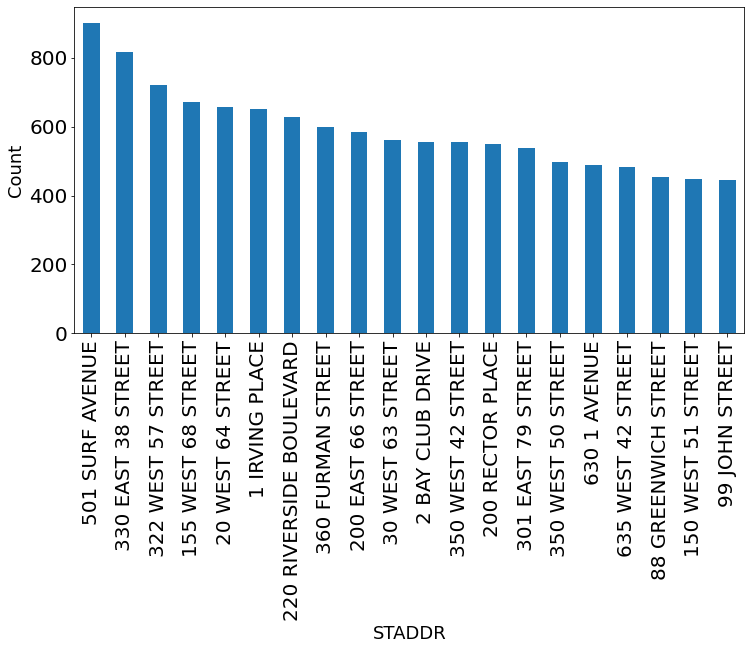

In [136]:
data['STADDR'].value_counts().head(20).plot(kind='bar')
plt.xlabel('STADDR', fontsize = 18)
plt.ylabel('Count', fontsize=18)

STADDR refers to the street address of the property

#### ZIP

In [137]:
data['ZIP'].count() * 100 / numrecords

97.20913469169761

In [138]:
len(data['ZIP'].unique())

197

In [139]:
data['ZIP'].value_counts()

10,314    24606
11,234    20001
10,312    18127
10,462    16905
10,306    16578
          ...  
11,005        1
11,241        1
11,371        1
11,359        1
10,162        1
Name: ZIP, Length: 196, dtype: int64

Text(0, 0.5, 'Count')

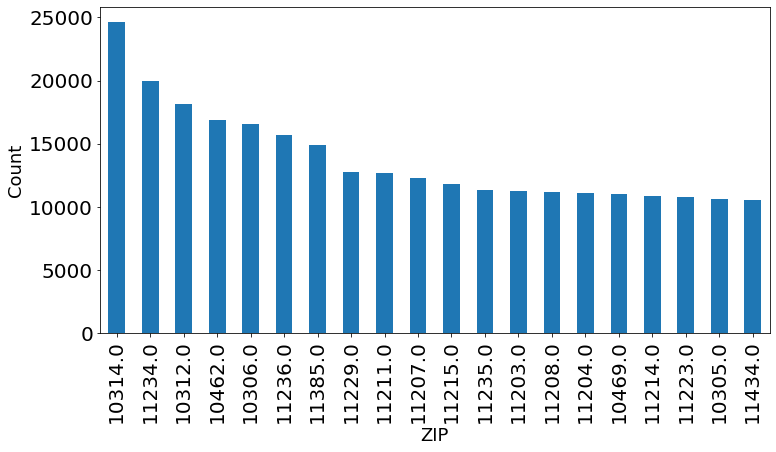

In [140]:
data['ZIP'].value_counts().head(20).plot(kind='bar')
plt.xlabel('ZIP', fontsize = 18)
plt.ylabel('Count', fontsize=18)

ZIP refers to the zipcode in which the property is in.

#### EXMPTCL

In [141]:
data['EXMPTCL'].count() * 100 / numrecords

1.4546299979271593

In [142]:
len(data['EXMPTCL'].unique())

15

In [143]:
data['EXMPTCL'].value_counts()

X1    6912
X5    5208
X7     820
X2     770
X6     764
X4     441
X8     292
X3     259
X9     108
VI       1
R4       1
KI       1
A9       1
5        1
Name: EXMPTCL, dtype: int64

Text(0, 0.5, 'log Scale of Count')

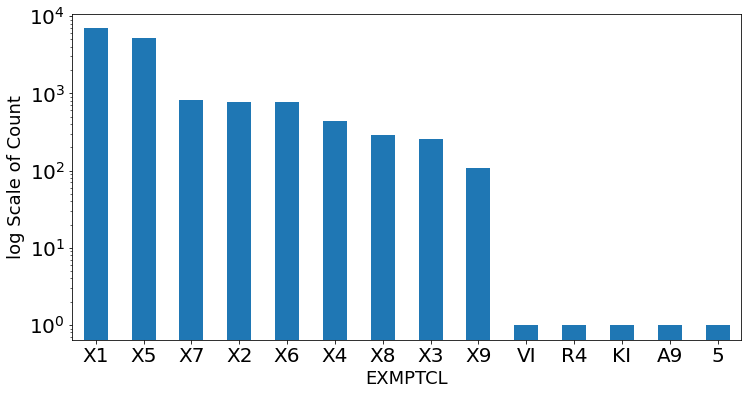

In [144]:
plt.yscale('log')
data['EXMPTCL'].value_counts().head(20).plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('EXMPTCL', fontsize = 18)
plt.ylabel('log Scale of Count', fontsize=18)

EXMPTCL refers to the exemption class of the property.

#### BLDFRONT

<AxesSubplot:xlabel='BLDFRONT'>

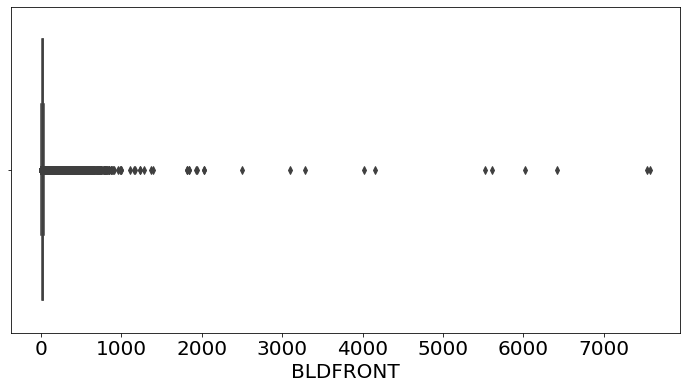

In [145]:
sns.boxplot(x='BLDFRONT', data=data)

/Users/faris/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'log Scale of Density')

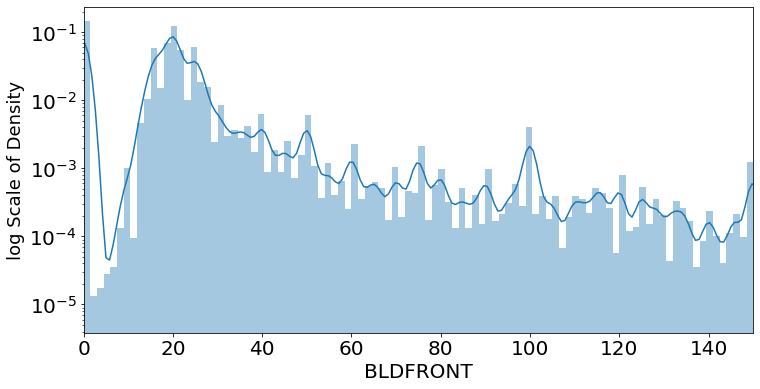

In [146]:
#look at the most relevant range
xhigh = 150
plt.xlim(0,xhigh)
temp = data[data['BLDFRONT'] <= xhigh]
sns.distplot(temp['BLDFRONT'],bins=100, kde=True)
plt.yscale('log')
plt.ylabel('log Scale of Density', fontsize=18)

BLDFRONT refers to building width.

/Users/faris/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BLDFRONT'>

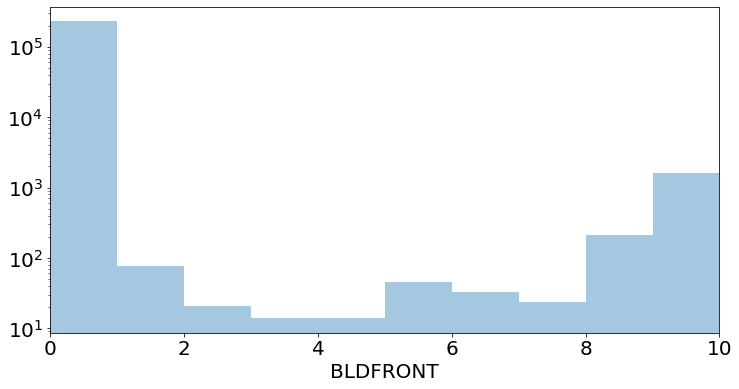

In [147]:
# look at the very small sizes, including zeros
xhigh = 10
plt.xlim(0,xhigh)
temp = data[data['BLDFRONT'] <= xhigh]
plt.yscale('log')
sns.distplot(temp['BLDFRONT'],bins=10, kde=False)

#### BLDDEPTH

<AxesSubplot:xlabel='BLDDEPTH'>

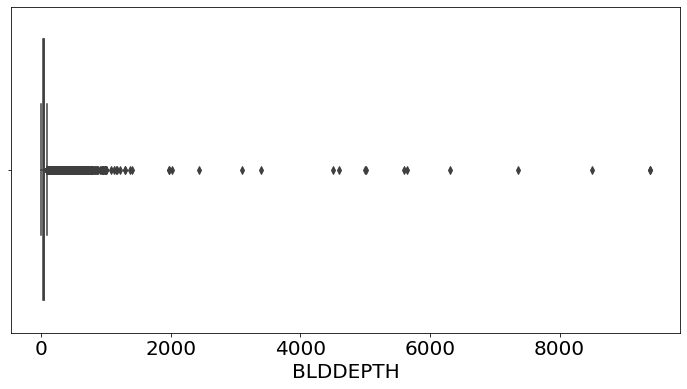

In [148]:
sns.boxplot(x='BLDDEPTH', data=data)

/Users/faris/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'log Scale of Density')

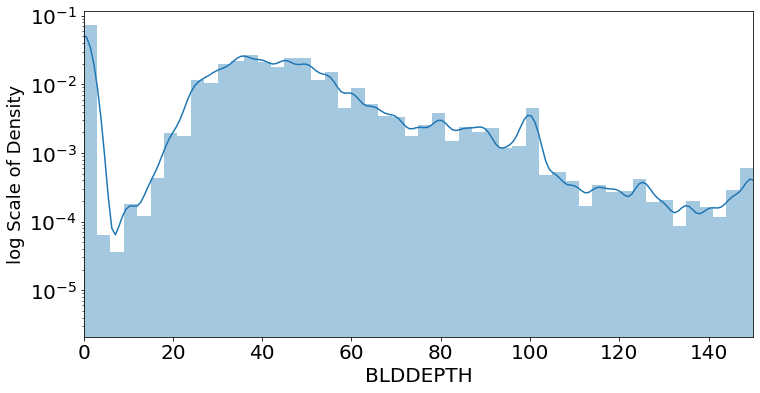

In [149]:
#look at the most relevant range
xhigh = 150
plt.xlim(0,xhigh)
temp = data[data['BLDDEPTH'] <= xhigh]
sns.distplot(temp['BLDDEPTH'],bins=50, kde=True)
plt.yscale('log')
plt.ylabel('log Scale of Density', fontsize=18)

BLDDEPTH refers to the building depth.

/Users/faris/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BLDDEPTH'>

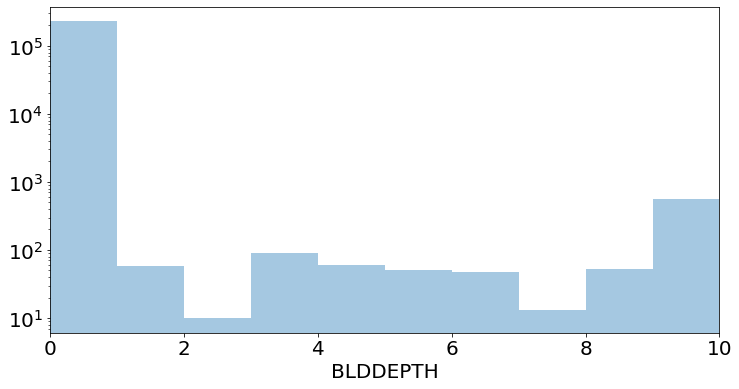

In [150]:
# look at the very small sizes, including zeros
xhigh = 10
plt.xlim(0,xhigh)
temp = data[data['BLDDEPTH'] <= xhigh]
plt.yscale('log')
sns.distplot(temp['BLDDEPTH'],bins=10, kde=False)

#### AVLAND2

In [151]:
data['AVLAND2'].count() * 100 / numrecords

26.398467218303743

/Users/faris/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'log Scale of Density')

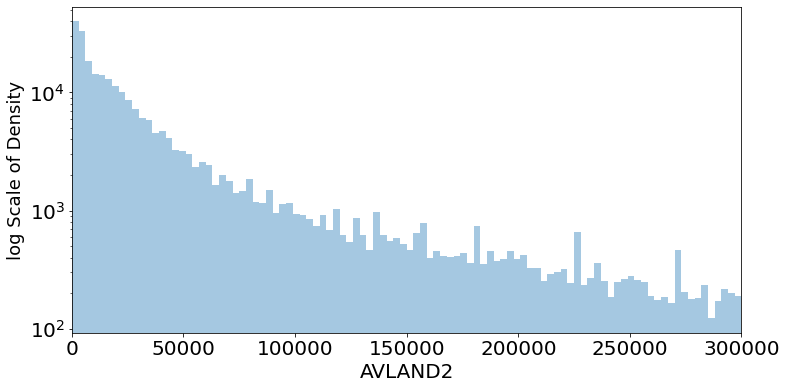

In [152]:
xhigh = 300000
plt.xlim(0,xhigh)
temp = data[data['AVLAND2'] <= xhigh]
sns.distplot(temp['AVLAND2'],bins=100, kde=False)
plt.yscale('log')
plt.ylabel('log Scale of Density', fontsize=18)

AVLAND2 refers to the transitional land value

#### AVTOT2

In [153]:
data['AVTOT2'].count() * 100 / numrecords

26.399027445531907

<AxesSubplot:xlabel='AVTOT2'>

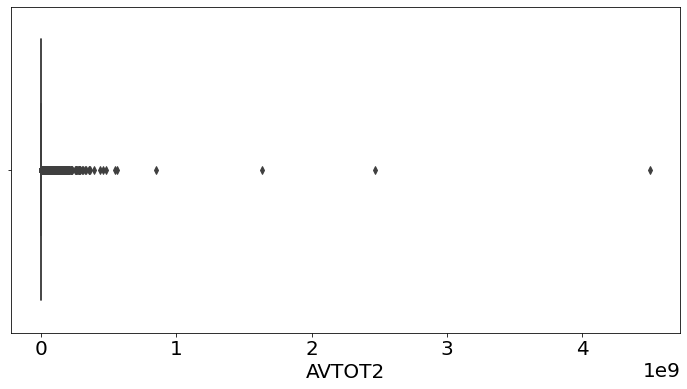

In [154]:
sns.boxplot(x='AVTOT2', data=data)

/Users/faris/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'log Scale of Density')

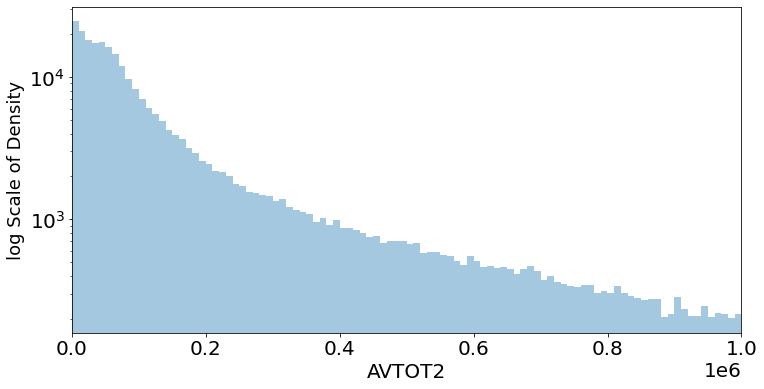

In [155]:
xhigh = 1000000
plt.xlim(0,xhigh)
temp = data[data['AVTOT2'] <= xhigh]
sns.distplot(temp['AVTOT2'],bins=100, kde=False)
plt.yscale('log')
plt.ylabel('log Scale of Density', fontsize=18)

AVTOT2 refers to the transitional total value.

#### EXLAND2

In [156]:
data['EXLAND2'].count() * 100 / numrecords

8.165218479281863

<AxesSubplot:xlabel='EXLAND2'>

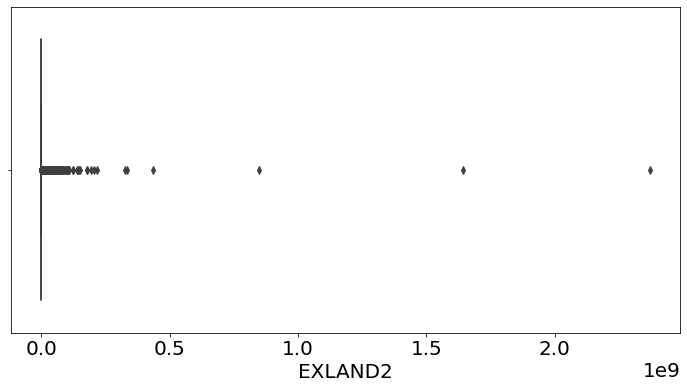

In [157]:
sns.boxplot(x='EXLAND2', data =data)

/Users/faris/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'log Scale of Density')

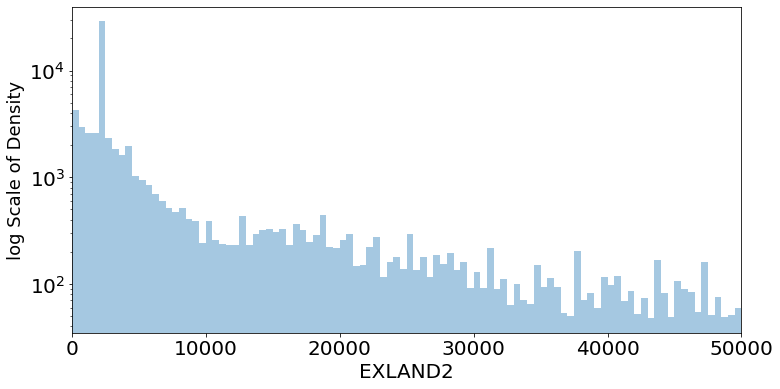

In [158]:
xhigh = 50000
plt.xlim(0,xhigh)
temp = data[data['EXLAND2'] <= xhigh]
sns.distplot(temp['EXLAND2'],bins=100, kde=False)
plt.yscale('log')
plt.ylabel('log Scale of Density', fontsize=18)

EXLAND2 refers to the transitional exemption land value

#### EXTOT2

In [159]:
data['EXTOT2'].count() * 100 / numrecords

12.215567967701032

<AxesSubplot:xlabel='EXTOT2'>

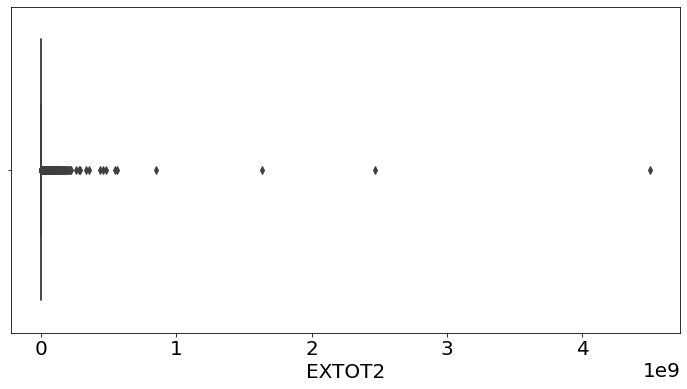

In [160]:
sns.boxplot(x='EXTOT2', data=data)

/Users/faris/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'log Scale of Density')

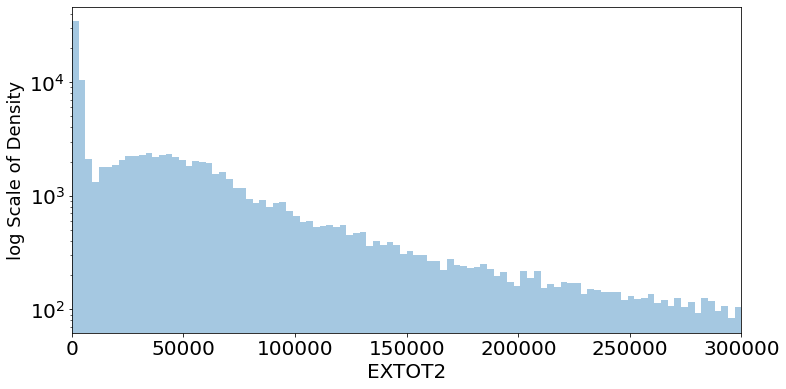

In [161]:
xhigh = 300000
plt.xlim(0,xhigh)
temp = data[data['EXTOT2'] <= xhigh]
sns.distplot(temp['EXTOT2'],bins=100, kde=False)
plt.yscale('log')
plt.ylabel('log Scale of Density', fontsize=18)

EXTOT2 refers to the transitional exemption land total.

#### EXCD2

In [162]:
data['EXCD2'].count() * 100 / numrecords

8.678666733893934

<AxesSubplot:xlabel='EXCD2'>

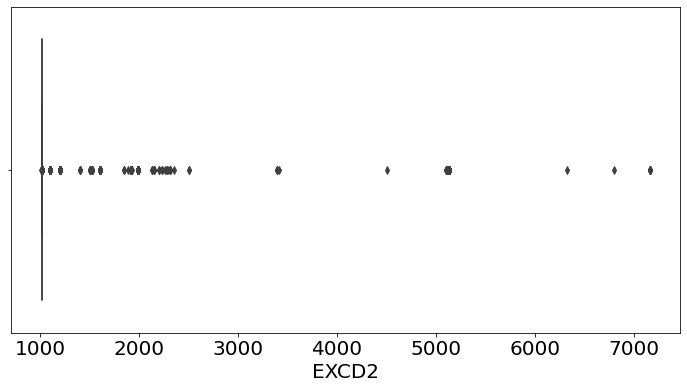

In [163]:
sns.boxplot(x='EXCD2', data=data)

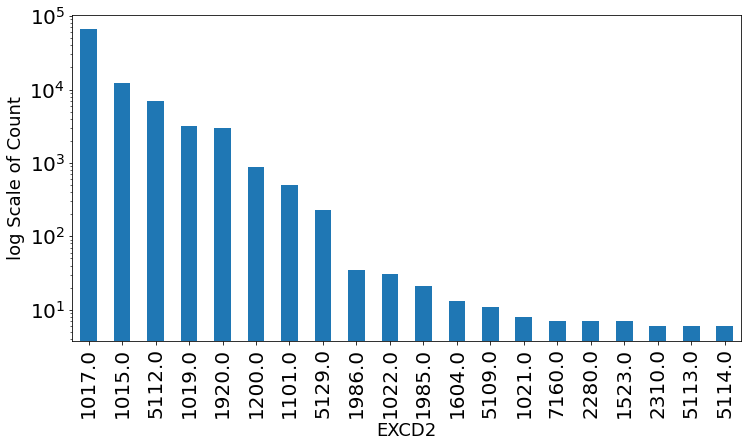

In [164]:
data['EXCD2'].value_counts().head(20).plot(kind='bar')
plt.xlabel('EXCD2', fontsize = 18)
plt.ylabel('log Scale of Count', fontsize=18)
plt.yscale('log')

EXCD2 refers to the exemption code 2

#### PERIOD

In [165]:
data['PERIOD'].count() * 100 / numrecords

100.0

In [166]:
len(data['PERIOD'].unique())

1

In [167]:
data['PERIOD'].value_counts()

FINAL    1070994
Name: PERIOD, dtype: int64

Text(0, 0.5, 'Count')

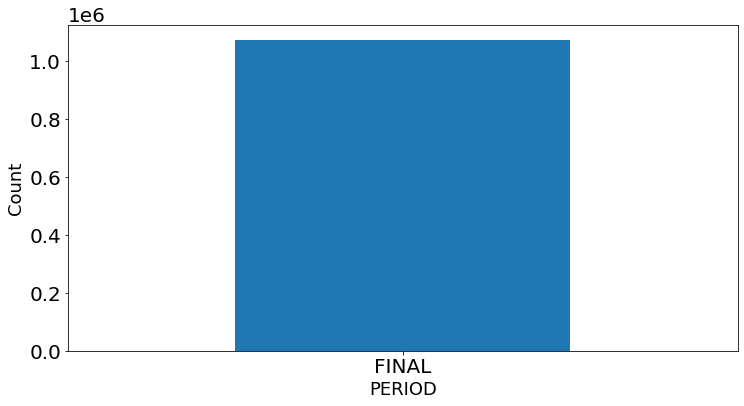

In [168]:
data['PERIOD'].value_counts().head(20).plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('PERIOD', fontsize = 18)
plt.ylabel('Count', fontsize=18)

There is only one period (FINAL). PERIOD refers to the assessment period which partains to the period when the data was created.

#### YEAR

In [169]:
data['YEAR'].count() * 100 / numrecords

100.0

In [170]:
len(data['YEAR'].unique())

1

In [171]:
data['YEAR'].value_counts()

2010/11    1070994
Name: YEAR, dtype: int64

Text(0, 0.5, 'Count')

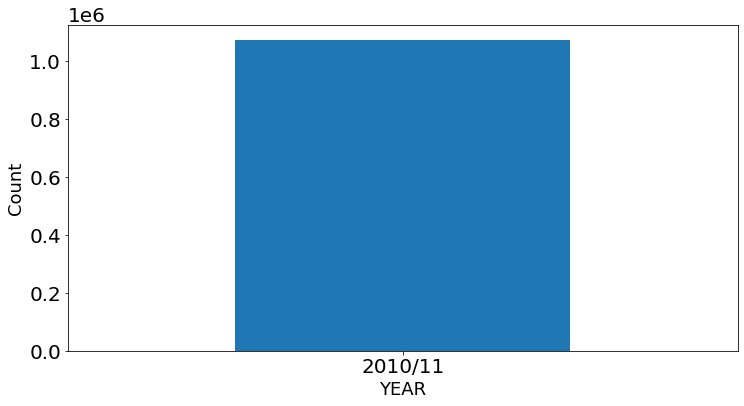

In [172]:
data['YEAR'].value_counts().head(20).plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('YEAR', fontsize = 18)
plt.ylabel('Count', fontsize=18)

YEAR refers to the assessment year.

#### VALTYPE

In [173]:
data['VALTYPE'].count() * 100 / numrecords

100.0

Text(0, 0.5, 'Count')

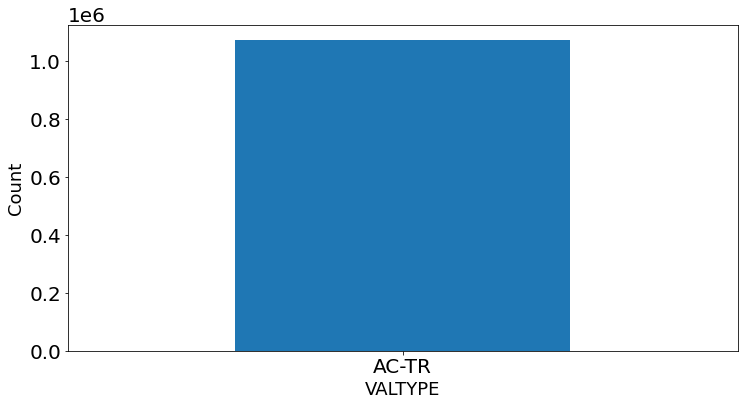

In [174]:
data['VALTYPE'].value_counts().head(20).plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('VALTYPE', fontsize = 18)
plt.ylabel('Count', fontsize=18)

In [175]:
data.columns

Index(['RECORD', 'BBLE', 'BORO', 'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL',
       'TAXCLASS', 'LTFRONT', 'LTDEPTH', 'EXT', 'STORIES', 'FULLVAL', 'AVLAND',
       'AVTOT', 'EXLAND', 'EXTOT', 'EXCD1', 'STADDR', 'ZIP', 'EXMPTCL',
       'BLDFRONT', 'BLDDEPTH', 'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2',
       'EXCD2', 'PERIOD', 'YEAR', 'VALTYPE'],
      dtype='object')